# KNN

In [28]:
PATH = "/home/mmahsereci/github/webpage/img/2021-09-23-knn/"
SAVE= False

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

from matplotlib import colors as mcolors
from matplotlib import cm

import numpy as np
np.random.seed(42)

## Iris dataset (first 2 features, 3 classes)

In [2]:
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target


In [3]:
X.shape

(150, 2)

In [4]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

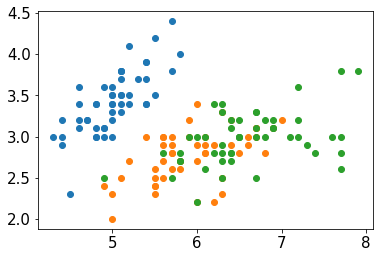

In [5]:
for label in range(3):
    idx = Y==label
    plt.scatter(X[idx, 0], X[idx, 1])


In [6]:
def compute_idx(x, X, Y, K):
    distances = np.sum((X - x) ** 2, axis=1)
    sorted_distances_index = np.argsort(distances)
    labels_neighbors = Y[sorted_distances_index[:K]]
    return sorted_distances_index, labels_neighbors
    
def plot_scatter(x, X, Y, sorted_distances_index):

    for k in range(K):
        idx_neighbor = sorted_distances_index[k]
        x_neighbor = X[idx_neighbor, :]
        plt.plot([x[0], x_neighbor[0]], [x[1], x_neighbor[1]], 'k', linestyle='solid', zorder=1)
        
    markers = ["o", "d", "x"]
    for label in range(3):
        idx = Y==label
        plt.scatter(X[idx, 0], X[idx, 1], s=50, marker=markers[label])
        
    plt.scatter(x[0], x[1], color='w', s=500, edgecolors='k', marker="*", zorder=2)
    plt.xticks([])
    plt.yticks([])

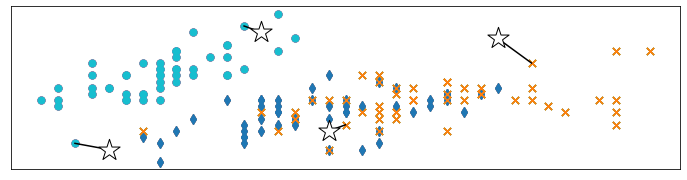

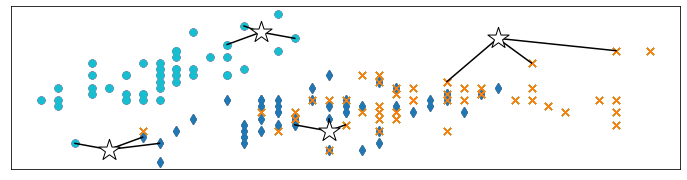

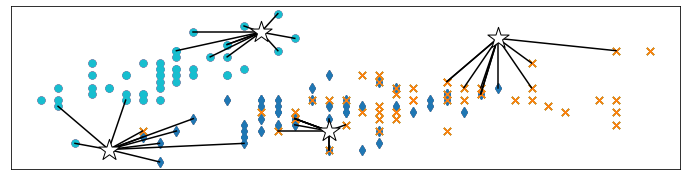

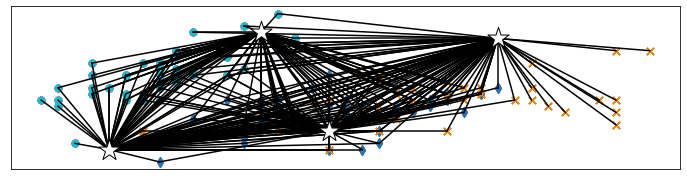

In [7]:
x1 = np.array([4.7, 2.2])
x2 = np.array([5.6, 4.1])
x3 = np.array([6.0, 2.5])
x4 = np.array([7., 4.])

Xstar = [x1, x2, x3, x4]

# for K in [1, 3, 10]:

#     plt.figure(figsize=(16, 12))
#     for i, x in enumerate(Xstar):
#         plt.subplot(2, 2, i+1)
#         x = Xstar[i]
#         sorted_distances_index, _ = compute_idx(x, X, Y, K)
#         plot_scatter(x, X, Y, sorted_distances_index)

#     plt.subplots_adjust(wspace=0.05, hspace=0.05)
#     plt.show()
    
for K in [1, 3, 10, 100]:

    plt.figure(figsize=(12, 3))
    for i, x in enumerate(Xstar):
        x = Xstar[i]
        sorted_distances_index, _ = compute_idx(x, X, Y, K)
        plot_scatter(x, X, Y, sorted_distances_index)

#     plt.show()
    if SAVE:
        plt.savefig(PATH + "00_" + str(K) + ".png", bbox_inches = 'tight',pad_inches = 0.05)


In [8]:
X.shape

(150, 2)

In [9]:
KK = X.shape[0]
fractions = []
winning = []
for i, x in enumerate(Xstar):
    print(i)
    x = Xstar[i]
    
    fractions_x = []
    winning_x = []
    for k in range(1, KK):
        sorted_distances_index, labels_neighbors = compute_idx(x, X, Y, k)
        n_neighbors = np.array([np.sum(labels_neighbors==label) for label in range(3)]) / k
        x_label =np.argmax(n_neighbors)
        
        fractions_x.append(n_neighbors)
        winning_x.append(x_label)
#         print(k, n_neighbors, x_label)
        
    fractions.append(fractions_x)
    winning.append(winning_x)
    


0
1
2
3


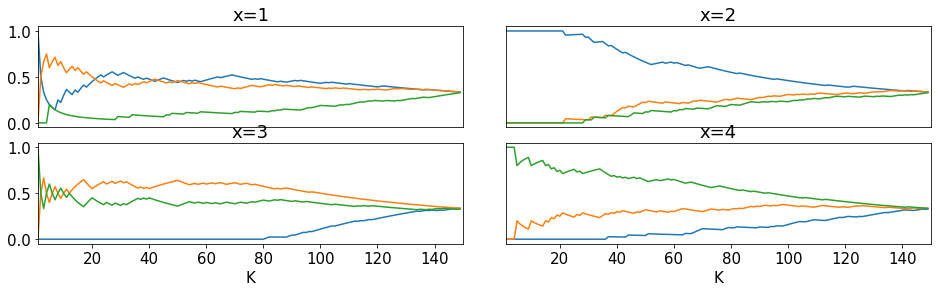

In [10]:
plt.figure(figsize=(16, 4))

kk = np.arange(1, KK, 1)
for i in range(4):
    plt.subplot(2, 2, i+1)
    ff = np.array(fractions[i])
    plt.plot(kk, ff)
    if i in [0, 1]:
        plt.xticks([])
    if i in [1, 3]:
        plt.yticks([])
    if i in [2, 3]:
        plt.xlabel("K")
        
    plt.ylim([-0.05, 1.05])
    plt.xlim([1, KK])
#     plt.xscale("log")
    plt.title("x="+str(i+1))
plt.subplots_adjust(wspace=0.1, hspace=0.15)
# plt.show()
if SAVE:
    plt.savefig(PATH + "01.png", bbox_inches = 'tight',pad_inches = 0.05)


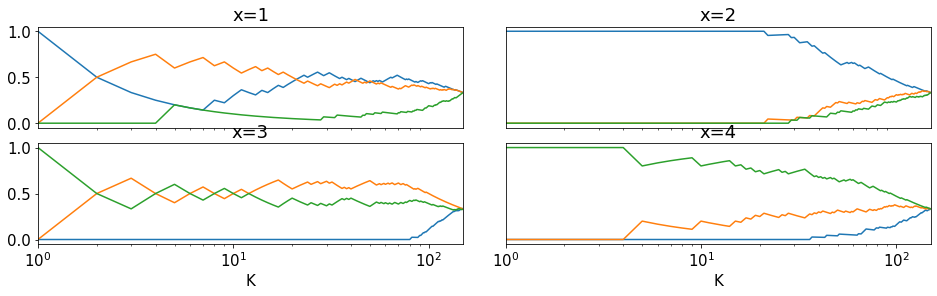

In [11]:
plt.figure(figsize=(16, 4))

kk = np.arange(1, KK, 1)
for i in range(4):
    plt.subplot(2, 2, i+1)
    ff = np.array(fractions[i])
    plt.plot(kk, ff)
    plt.xscale("log")
    if i in [0, 1]:
        plt.xticks([])
    if i in [1, 3]:
        plt.yticks([])
    if i in [2, 3]:
        plt.xlabel("K")
    plt.ylim([-0.05, 1.05])
    plt.xlim([1, KK])
    plt.title("x="+str(i+1))
plt.subplots_adjust(wspace=0.1, hspace=0.15)
# plt.show()
if SAVE:
    plt.savefig(PATH + "01_log.png", bbox_inches = 'tight',pad_inches = 0.05)


In [32]:
ff.shape

(149, 3)

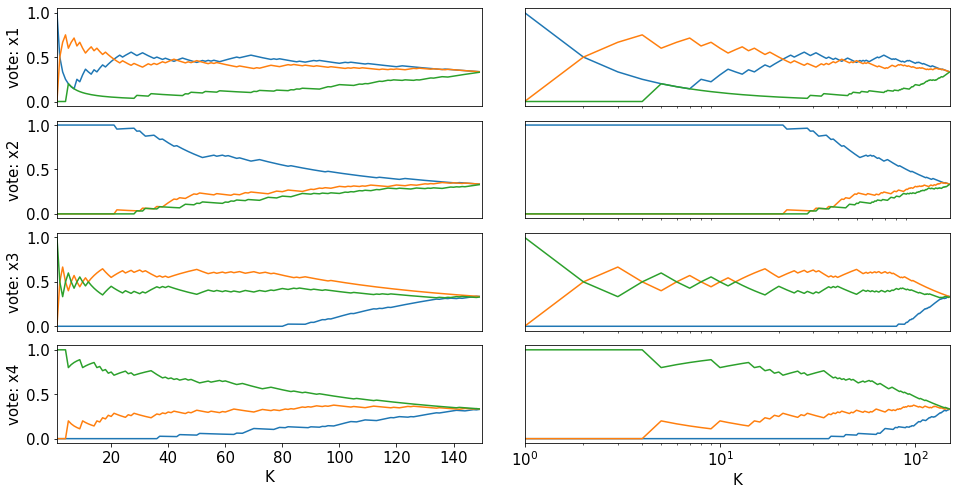

In [27]:
plt.figure(figsize=(16, 8))

kk = np.arange(1, KK, 1)

# left column
for i in range(4):
    plt.subplot(4, 2, 2*i + 1)

    ff = np.array(fractions[i])
    plt.plot(kk, ff)

    if not i == 3:
        plt.xticks([])
    if i == 3:
        plt.xlabel("K")

    plt.ylim([-0.05, 1.05])
    plt.xlim([1, KK])
    
    plt.ylabel("vote: x"+str(i+1))

for i in range(4):
    plt.subplot(4, 2, 2*i + 2)

    ff = np.array(fractions[i])
    plt.plot(kk, ff)
    plt.xscale("log")

    plt.yticks([])
    if not i == 3:
        plt.xticks([])
    if i == 3:
        plt.xlabel("K")

    plt.ylim([-0.05, 1.05])
    plt.xlim([1, KK])
    
plt.subplots_adjust(wspace=0.1, hspace=0.15)

# plt.show()
if SAVE:
    plt.savefig(PATH + "03.png", bbox_inches = 'tight',pad_inches = 0.05)

- for K=N the nearset neighbor would be the cluster with the most points
- no separtion betweeen model and data. Thealgrihm is the model?
- different distances
- odd number f K so tehre is no draw for binary
- K = sqrt(N), but why?
- cross validation
- non-parametric (its model adjust with the number of datapoitns)
- units, normalization

# Thumbnail

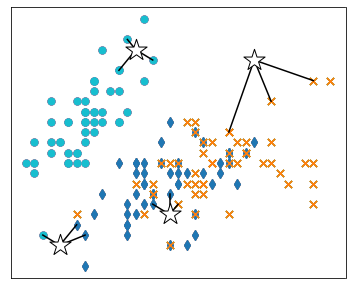

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))

K = 3

for i, x in enumerate(Xstar):
    x = Xstar[i]
    sorted_distances_index, _ = compute_idx(x, X, Y, K)
    plot_scatter(x, X, Y, sorted_distances_index)
# plt.show()

# plt.savefig(PATH + "thumbnail.png", 
#             bbox_inches = 'tight',pad_inches = 0.05)